<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовока-данных" data-toc-modified-id="Подготовока-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовока данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Данные-об-электродах" data-toc-modified-id="Данные-об-электродах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Данные об электродах</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(объём)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(объём)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (объём)</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(время)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#Данные-о-продувке-сплава-газом" data-toc-modified-id="Данные-о-продувке-сплава-газом-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Данные о продувке сплава газом</a></span></li><li><span><a href="#Результаты-измерения-температуры" data-toc-modified-id="Результаты-измерения-температуры-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Результаты измерения температуры</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(объём)" data-toc-modified-id="Данные-о-проволочных-материалах-(объём)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Данные о проволочных материалах (объём)</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(время)" data-toc-modified-id="Данные-о-проволочных-материалах-(время)-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Данные о проволочных материалах (время)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Проект "оптимизация производительности на производстве"

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).


# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# План работы

1. Подготовка данных:
    * Замена названия столбцов;
    * Обработка явных выбросов;
    * Проверка данных на пропуски;
    * Проверка данных на дубликаты.
2. Подготовка признаков:
    * Объединение таблиц для последующего обучения моделей;
    * Обработка пропусков;
    * Изменение типов данных на наиболее подходящие;
    * Разбитие данных на обучающую и тестовую выборку;
3. Построение и обучение моделей. Использование регрессивных моделей: LinearRegression, RandomForestRegression, DecisionTreeRegressor, LGBMRegressor, CatBoostRegressor.
    * Кодирование категориальных признаков;
    * Масштабирование признаков;
    * Обучите разных моделей и оценка их качества кросс-валидацией.
4. Оценка эффективности моделей на тестовой выборке
5. Финальный отчет.

## Подготовока данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

RND = 101022
TS = 0.25

In [2]:
# к.р.
try:
    data_arc = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_gas.csv')
    data_temp = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_temp.csv')
    data_wire = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('C:/Users/Pavel/Downloads/final_steel/final_steel/data_wire_time.csv')
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

## Изучение данных

### Данные об электродах

In [3]:
data_arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


In [4]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Приведем названия столбцом к более удобным названиям для работы с ними

In [6]:
data_arc = data_arc.rename(columns={'Начало нагрева дугой' : 'start_of_arc_heating',
                                    'Конец нагрева дугой' : 'end_of_arc_heating',
                                    'Активная мощность' : 'active_power',
                                    'Реактивная мощность' : 'reactive_power'})

In [7]:
data_arc.head(10)

,key,start_of_arc_heating,end_of_arc_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


In [8]:
data_arc.shape

(14876, 5)

In [9]:
data_arc.isna().sum()

key                     0
start_of_arc_heating    0
end_of_arc_heating      0
active_power            0
reactive_power          0
dtype: int64

In [10]:
data_arc.duplicated().sum()

0

Можно заметить выброс в значение реактивной мощности. Стоит проверить много ли таких данных.

In [11]:
data_arc.query('reactive_power < 0')

,key,start_of_arc_heating,end_of_arc_heating,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


In [12]:
data_arc.query('key == 2116')

,key,start_of_arc_heating,end_of_arc_heating,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


Отрицательно значение реактивной мощности является выбросом и мы никак не можем заменить его. Удалил все значения по ключу.

In [13]:
data_arc = data_arc.query('key != 2116')

In [14]:
data_arc.shape

(14872, 5)

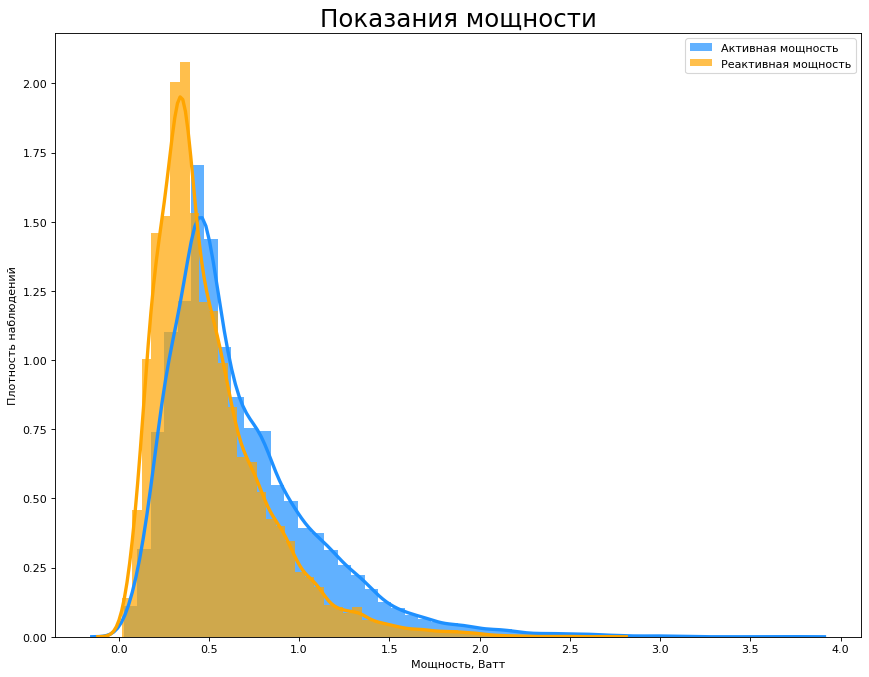

In [15]:
x0 = data_arc['active_power']
x1 = data_arc['reactive_power']
    
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(x0, color="dodgerblue", label="Активная мощность", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(x1, color="orange", label="Реактивная мощность", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title(label='Показания мощности', fontsize=22)
plt.xlabel('Мощность, Ватт')
plt.ylabel('Плотность наблюдений')
plt.legend()
plt.show()

Ярковыраженных выбросов после удаления значения не наблюдается. Графики распределения реактивной и активной мощности похожи.
Распределение нормальное со сдвигом влево

### Данные о подаче сыпучих материалов (объём)

In [16]:
data_bulk.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [17]:
data_bulk.shape

(3129, 16)

In [18]:
data_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [19]:
data_bulk.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

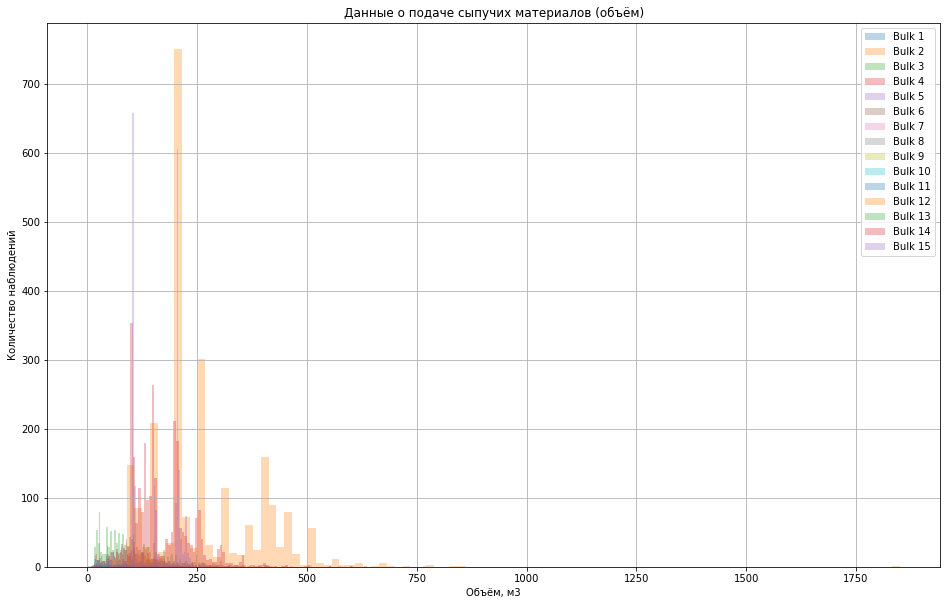

In [48]:
for column in data_bulk.columns:
    if column[0] == 'B':
        data_bulk[column].hist(bins=100, label=column, figsize=(16,10), alpha=0.3)
        plt.title(label='Данные о подаче сыпучих материалов (объём)')
        plt.xlabel('Объём, м3')
        plt.ylabel('Количество наблюдений')
        plt.legend()

Все данные лежат приблизительно в одной диапазоне кроме Bulk 12, который ярко выражается своим количеством и объемом. Почти все данные лежат в диапазоне от 0 до 280 м3

В данных присутствует очень много пропусков, обусловленные спецификой технологического процесса, которые в дальнейшем заменим на 0

### Данные о подаче сыпучих материалов (время)

In [21]:
data_bulk_time.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


In [22]:
data_bulk_time.shape

(3129, 16)

In [23]:
data_bulk_time.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

В данных присутствуют много пропусков, обусловленные спецификой технологического процесса.

### Данные о продувке сплава газом

In [24]:
data_gas.head(10)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


In [25]:
data_gas.shape

(3239, 2)

In [26]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [27]:
data_gas.isna().sum()

key      0
Газ 1    0
dtype: int64

Приведем названия столбца к более удобному названию для работы с ним

In [28]:
data_gas = data_gas.rename(columns={'Газ 1' : 'gas_1'})

In [29]:
data_gas.head(10)

,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


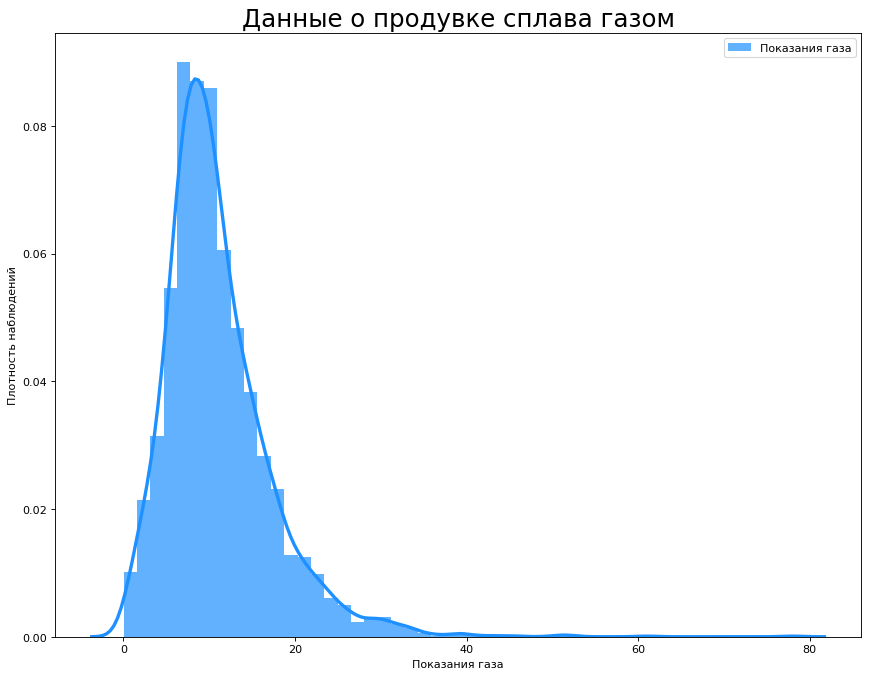

In [30]:
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(data_gas['gas_1'], color="dodgerblue", label="Показания газа", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title(label='Данные о продувке сплава газом', fontsize=22)
plt.xlabel('Показания газа')
plt.ylabel('Плотность наблюдений')
plt.legend()
plt.show()

Ярковыраженных выбросов не наблюдается. Распределение нормальное со сдвигом влево. Основные показания находятся ммежду 0 и 20

### Результаты измерения температуры

In [31]:
data_temp.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


Приведем названия столбцом к более удобным названиям для работы с ними

In [32]:
data_temp = data_temp.rename(columns={'Время замера' : 'measurement_time',
                                   'Температура' : 'temperature'})

In [33]:
data_temp.head(10)

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [34]:
data_temp.isna().sum()

key                    0
measurement_time       0
temperature         2901
dtype: int64

In [35]:
data_temp.describe()

,key,temperature
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [36]:
data_temp.shape

(15907, 3)

Так как мы знаем от поставщика, что температура не может быть ниже 1500 градусов, то проверим все выбросы в этих данных.

In [37]:
data_temp.query('temperature < 1500')

,key,measurement_time,temperature
4350,867,2019-06-04 14:21:00,1191.0
5978,1214,2019-06-16 05:32:00,1208.0
7958,1619,2019-06-30 11:03:54,1218.0
8913,1818,2019-07-07 00:30:49,1383.0
8914,1818,2019-07-07 00:31:40,1383.0
10127,2052,2019-07-21 14:51:40,1227.0
12564,2561,2019-08-08 07:34:15,1204.0


Так как мы не можем заменить эти значения на какие-то другие, то удалим эти значения по ключу

In [38]:
data_temp = data_temp.query('key != [867, 1214, 1619, 1818, 2052, 2561]')

In [39]:
data_temp.shape

(15857, 3)

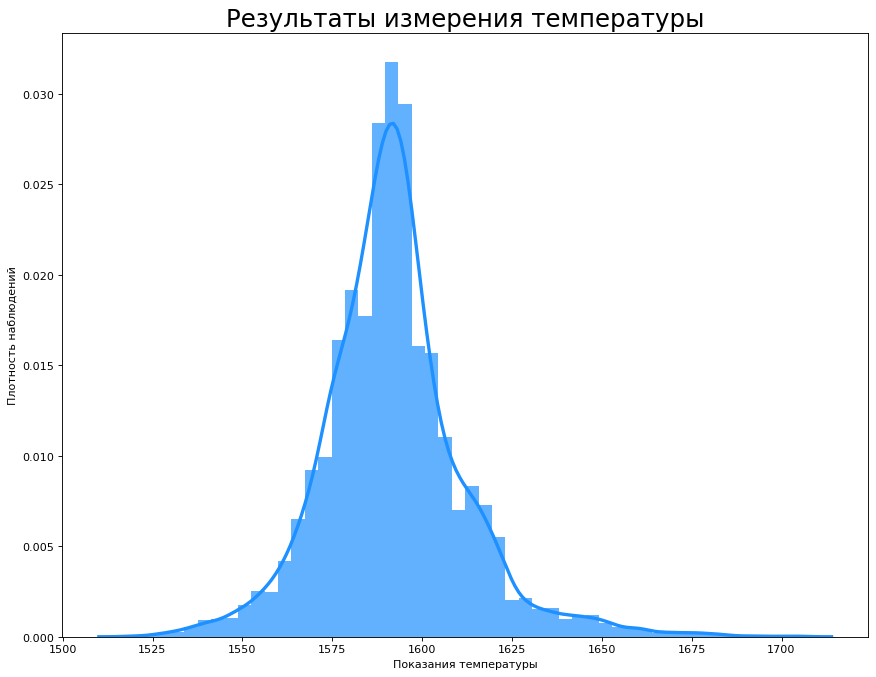

In [40]:
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(data_temp['temperature'], color="dodgerblue",  hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title(label='Результаты измерения температуры', fontsize=22)
plt.xlabel('Показания температуры')
plt.ylabel('Плотность наблюдений')
plt.show()

Основные данные температуры находятся в пределах 1500 - 1650 градусов. Ярковыраженных выбросов нету. Распределение нормальное.

Есть пропущенные значения, их мы удалим во время предобработки данныхю по причине того, что данные без значения температуры не несут для нас никакой информации.

### Данные о проволочных материалах (объём)

In [41]:
data_wire.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data_wire.shape

(3081, 10)

In [43]:
data_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [44]:
data_wire.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

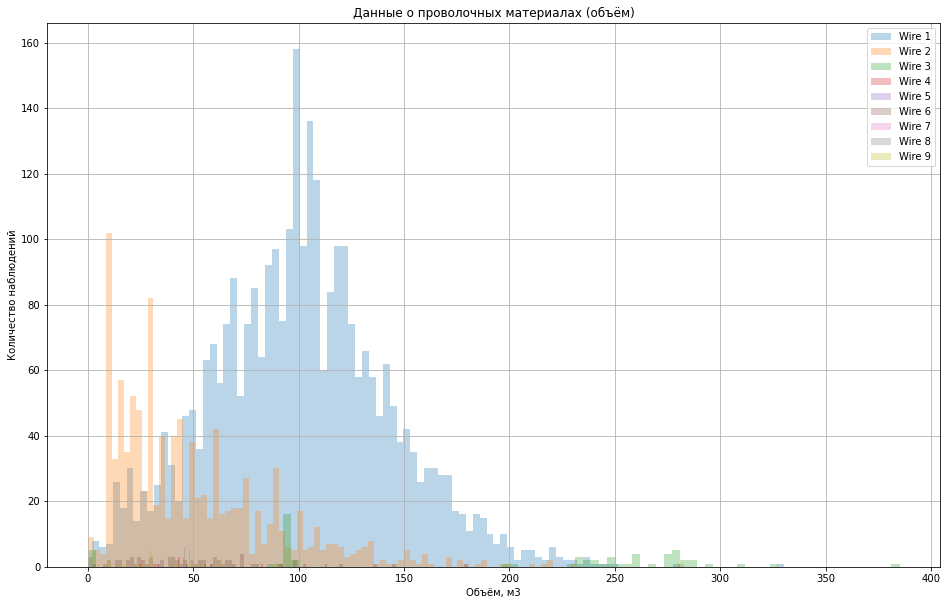

In [45]:
for column in data_wire.columns:
    if column[0] == 'W':
        data_wire[column].hist(bins=100, label=column, figsize=(16,10), alpha=0.3)
        plt.title(label='Данные о проволочных материалах (объём)')
        plt.xlabel('Объём, м3')
        plt.ylabel('Количество наблюдений')
        plt.legend()

Основные значени лежат между 0 и 200 м3. Больше всего выделяется Wire 1. Ярковыраженных выбросов не наблюдается.

В данных присутствует очень много пропусков, обусловленные спецификой технологического процесса, которые в дальнейшем заменим на 0

### Данные о проволочных материалах (время)

In [46]:
data_wire_time.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data_wire_time.shape

(3081, 10)

### Вывод

Предоставленные данные имеют аномалии:
* Разноязочные названия столбцов, что усложняет работу;
* Явный выброс в показание реактивной мощности;
* Несоотвествующие типы данных;
* Присутствуют пропуски данных. Возможно из-за сбоя датчиков и некоторые показания не поступали в базу;

Необходима предобработка данных для устранения аномалий в данных.

Необходимо объединить данные по столбцу `key`